In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
plt.rcParams['figure.figsize'] = [8,6]
from plot_stats import *

In [71]:
df_mean_h

,mean,type,Model
1,0.518052,NLP,Hybrid
5,0.560023,NLP,Logistic Regression
7,0.587027,NLP,RNN
3,0.590491,NLP,WSLS
2,0.657400,Accuracy,WSLS
4,0.671327,Accuracy,Logistic Regression
6,0.673500,Accuracy,RNN
0,0.701200,Accuracy,Hybrid


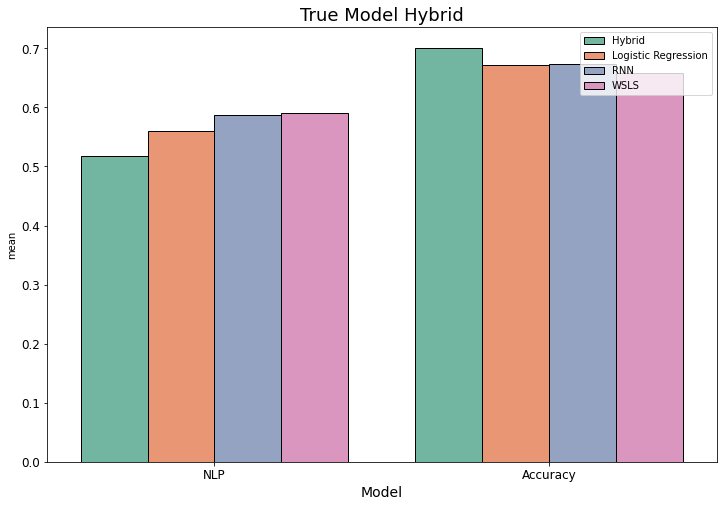

In [70]:
df_hybrid = pd.read_csv(f'../data/hybrid/results/hybrid_fit_dataframe.csv')
df_mean_h = pd.DataFrame((df_hybrid.describe().loc['mean']))
df_mean_h = df_mean_h.T
df_mean_h.drop(columns=['Unnamed: 0', 'agent', 'train_nlp_hybrid','train_nlp_wsls',
       'train_nlp_logistic_regression','train_acc_rnn', 'train_nlp_rnn'],inplace=True)
df_mean_h = df_mean_h.T
df_mean_h.set_index(np.arange(len(df_mean_h)),inplace=True)
col_1 = ['Accuracy','NLP','Accuracy','NLP','Accuracy','NLP','Accuracy','NLP']
col_2 = ['Hybrid','Hybrid','WSLS','WSLS','Logistic Regression','Logistic Regression','RNN','RNN']
df_mean_h['type'] = col_1
df_mean_h['Model'] = col_2

df_mean_h.sort_values(['mean','type'],ascending=True,inplace=True)

x_1 = sns.color_palette("Set2")[0]
x_2 = sns.color_palette("Set2")[1]
x_3 = sns.color_palette("Set2")[2]
x_4 = sns.color_palette("Set2")[3]
co = [x_1,x_2,x_3,x_4]

plt.figure(figsize=(12,8))
sns.barplot(x='type',y='mean',data=df_mean_h ,hue='Model',palette=co,edgecolor='black')
plt.title('True Model Hybrid',size=18)
plt.xlabel('Model',size=14)
plt.tick_params(labelsize=12)

plt.legend(loc='upper right')
plt.show()

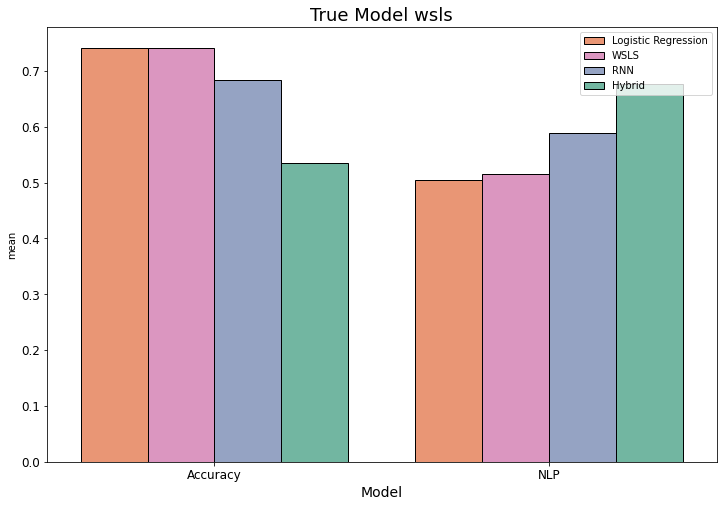

In [42]:
df_wsls = pd.read_csv(f'../data/wsls/results/wsls_fit_dataframe.csv')
df_mean_wsls = pd.DataFrame((df_wsls.describe().loc['mean']))
df_mean_wsls = df_mean_wsls.T
df_mean_wsls.drop(columns=['Unnamed: 0', 'agent', 'train_nlp_hybrid','train_nlp_wsls',
       'train_nlp_logistic_regression','train_acc_rnn', 'train_nlp_rnn'],inplace=True)
df_mean_wsls = df_mean_wsls.T
df_mean_wsls.set_index(np.arange(len(df_mean_wsls)),inplace=True)
col_1 = ['Accuracy','NLP','Accuracy','NLP','Accuracy','NLP','Accuracy','NLP']
col_2 = ['Hybrid','Hybrid','WSLS','WSLS','Logistic Regression','Logistic Regression','RNN','RNN']
df_mean_wsls['type'] = col_1
df_mean_wsls['Model'] = col_2
# df_mean['mean'] = [np.log2(np.exp(df_mean['mean'][i])) \
# if (df_mean['type'][i] == 'NLP') else df_mean['mean'][i] for i in range(len(df_mean))]
df_mean_wsls.sort_values(['mean','type'],ascending=False,inplace=True)

x_1 = sns.color_palette("Set2")[0]
x_2 = sns.color_palette("Set2")[1]
x_3 = sns.color_palette("Set2")[2]
x_4 = sns.color_palette("Set2")[3]
co = [x_2,x_4,x_3,x_1]

plt.figure(figsize=(12,8))
sns.barplot(x='type',y='mean',data=df_mean_wsls ,hue='Model',palette=(co),edgecolor='black')
plt.title('True Model wsls',size=18)
plt.xlabel('Model',size=14)
plt.tick_params(labelsize=12)
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'W')

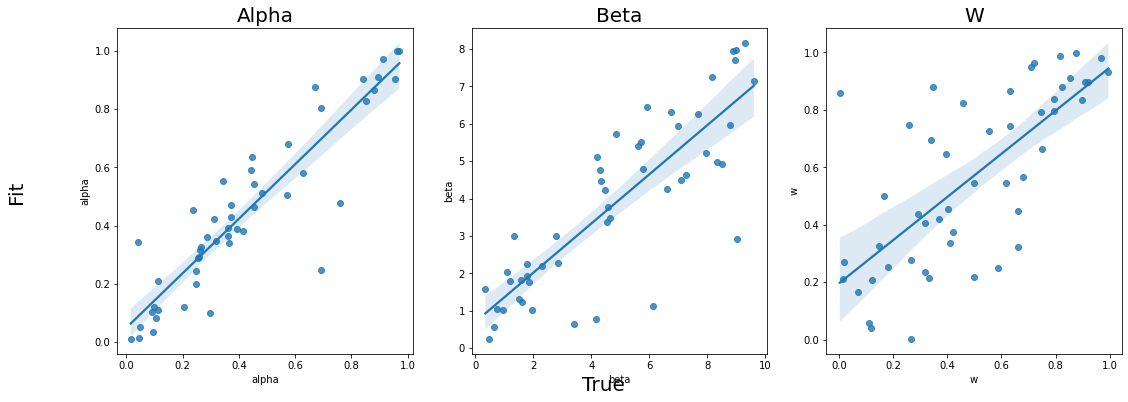

In [62]:
NUM = 8 # num of sim

param = {'alpha':[],
        'beta':[],
        'w':[]
}
alpha = 0
beta = 0 
w = 0 
for i,p in enumerate (df_hybrid['fit_parameters_hybrid']):
    p = p.replace('[','')
    p = p.replace(']','')
    p = p.replace('  ',' ')
    indices = [z for z, w in enumerate(p) if w == '.']
    x_0 = p[(indices[0]-1):(indices[1]-2)]
    x_1 = p[(indices[1]-1):(indices[2]-2)]
    x_2 = p[(indices[2]-1):]
    alpha+=float(x_0)
    beta+=float(x_1)
    w+=float(x_2)
    if i!=0 and i%NUM==(NUM-1):
        param['alpha'].append(alpha/NUM)
        param['beta'].append(beta/NUM)
        param['w'].append(w/NUM)
        alpha = 0
        beta = 0 
        w = 0 
df_fit_param = pd.DataFrame(param)
df_true_param = pd.read_csv('../data/hybrid/sim_data/hybrid_paramters.csv')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

fig.text(0.5, 0.04, 'True', ha='center',size=20)
fig.text(0.04, 0.5, 'Fit', va='center', rotation='vertical',size=20)

# Bulbasaur
sns.regplot(ax=axes[0], x=df_true_param['alpha'],y=df_fit_param['alpha'])
axes[0].set_title('Alpha',size=20)

# Charmander
sns.regplot(ax=axes[1],x=df_true_param['beta'],y=df_fit_param['beta'])
axes[1].set_title('Beta',size=20)

# Squirtle
sns.regplot(ax=axes[2],x=df_true_param['w'],y=df_fit_param['w'])
axes[2].set_title('W',size=20)

Text(0.5, 1.0, 'p_loss_shift')

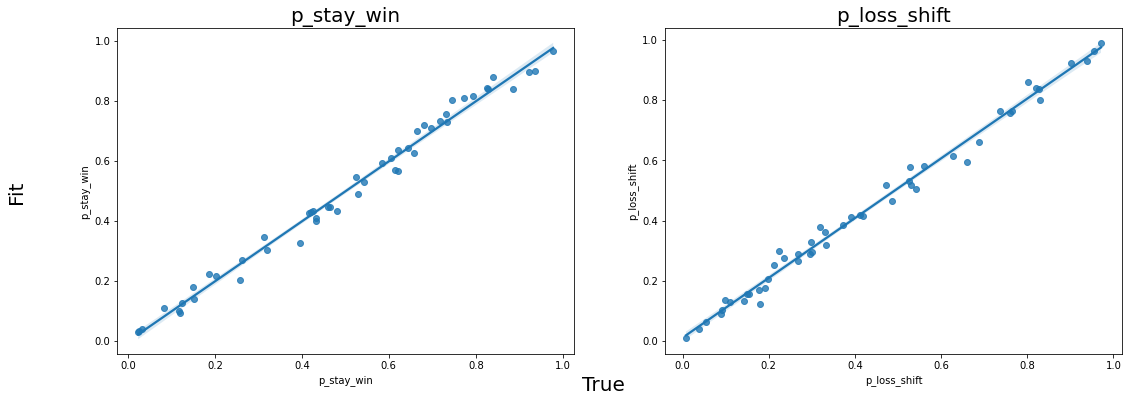

In [63]:
NUM = 8 # num of sim

param = {'p_stay_win':[],
        'p_loss_shift':[]
}
p_stay_win = 0
p_loss_shift = 0 
for i,p in enumerate (df_wsls['fit_parameters_wsls']):
    p = p.replace('[','')
    p = p.replace(']','')
    p = p.replace('  ',' ')
    indices = [z for z, w in enumerate(p) if w == '.']
    x_0 = p[(indices[0]-1):(indices[1]-2)]
    x_1 = p[(indices[1]-1):]
    p_stay_win+=float(x_0)
    p_loss_shift+=float(x_1)
    if i!=0 and i%NUM==(NUM-1):
        param['p_stay_win'].append(p_stay_win/NUM)
        param['p_loss_shift'].append(p_loss_shift/NUM)
        p_stay_win = 0
        p_loss_shift = 0 

df_fit_param = pd.DataFrame(param)
df_true_param = pd.read_csv('../data/wsls/sim_data/wsls_paramters.csv')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

fig.text(0.5, 0.04, 'True', ha='center',size=20)
fig.text(0.04, 0.5, 'Fit', va='center', rotation='vertical',size=20)

# Bulbasaur
sns.regplot(ax=axes[0], x=df_true_param['p_stay_win'],y=df_fit_param['p_stay_win'])
axes[0].set_title('p_stay_win',size=20)

# Charmander
sns.regplot(ax=axes[1],x=df_true_param['p_loss_shift'],y=df_fit_param['p_loss_shift'])
axes[1].set_title('p_loss_shift',size=20)

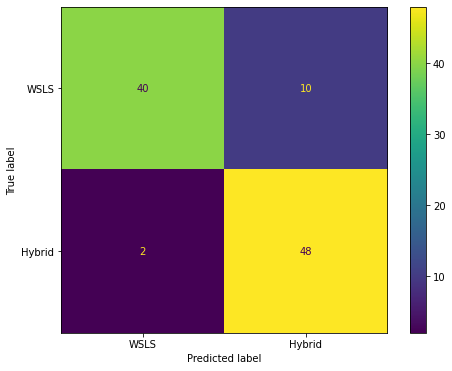

In [93]:
df = df_hybrid.groupby(['agent'])['test_nlp_rnn'].mean().reset_index()
df['test_nlp_hybrid'] = df_hybrid.groupby(['agent'])['test_nlp_hybrid'].mean()
df['diff'] = df['test_nlp_rnn'] - df['test_nlp_hybrid']
df['true_b'] = np.repeat(1,50)
df ['predict_b'] = [0 if x < 0 else 1 for x in df['diff']]
y_true = np.array(df['true_b'])
y_pred = np.array(df['predict_b'])

df = df_wsls.groupby(['agent'])['test_nlp_rnn'].mean().reset_index()
df['test_nlp_hybrid'] = df_wsls.groupby(['agent'])['test_nlp_hybrid'].mean()
df['diff'] = df['test_nlp_rnn'] - df['test_nlp_hybrid']
df['true_b'] = np.repeat(0,50)
df ['predict_b'] = [0 if x < 0 else 1 for x in df['diff']]

y_true =np.concatenate((y_true,np.array(df['true_b'])))
y_pred = np.concatenate((y_pred,np.array(df['predict_b'])))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_true,
                                        y_pred=y_pred,
                                        display_labels=['WSLS', 'Hybrid'])

In [94]:
data_per_agent = []
for a in range(50):
    data = []
    for s in range(8):
        data.append(pd.read_csv(f'../data/hybrid/sim_data/hybrid_agent_{a}_sim_{s}.csv'))
    data_per_agent.append(data)
    
new_aa = []
for a in range(50):
    train_data = [data_per_agent[a][sim] for sim in range(8)]
    train_data = pd.concat(train_data) 
    train_data.reset_index(inplace=True)
    new_aa.append(train_data)
data_per_agent = new_aa

for a in range(50):
    data_per_agent[a]['right'] = (data_per_agent[a]['action_stage_1'] == data_per_agent[a]['correct']).astype(int)
sum_c = np.array([data_per_agent[a]['right'].mean() for a in range(50)])
sum_c.mean()

0.61005